# **Mamba: Linear-Time Sequence Modeling with Selective State Spaces**


https://arxiv.org/pdf/2312.00752.pdf

## **1. Introduction**

대량의 데이터로 사전학습 후 downstream task에 적용하는 대규모 모델은 현대 머신 러닝에서 효과적인 패러다임으로 등장  

이러한 모델의 backbone은 주로 임의의 sequence를 입력으로 하여 넓은 범위의 도메인에서 연산하는 transformer와 같은 sequence models임  

self-attention의 효과는 복잡한 데이터를 모델링할 수 있도록 context window 내에 정보를 촘촘하게 이용할 수 있는 능력으로 부터 나오지만, 이는 유한한 윈도우 외부의 어떤 것도 모델링할 수 없고 윈도우 길이에 대한 2차 스케일링을 갖는다는 단점이 있음  

이러한 단점을 극복하기 위해 보다 효율적인 attention 기반의 연구들이 진행되고 있지만 아직 이러한 변형 중 어느 것도 도메인 전반에 걸쳐 규모 면에서 경험적으로 효과적으로 나타나지 않음.  

Structured state space sequence models(SSMs)은 최근 sequence modeling 구조로 부상중인 클래스, 이는 고전 SSM으로부터 영감을 받아 RNN, CNN을 결합하여 sequence length에 대해서 linear or near-linear time으로 효율적으로 계산할 수 있음, 그러나 text와 같이 이산적이고 information-dense data에 대해서는 덜 효율적임  

저자는 새로운 클래스 selective state space models을 소개

**Selection Mechanism :**  
기존 모델들의 한계를 입력에 의존하여 효과적으로 data을 선택하는 능력이라 생각  
SSM parametes를 입력에 기반하여 모수화를 하여 모델이 관련없는 정보는 필터링하고 관련있는 정보만 기억할 수 있도록 함  

**Hardware-aware Algorithm :**  
기존의 모든 SSM은 효율적인 계산을 위해서 time-invariant and input-invariant를 만족해야 했음, 이를 극복하기 위해  
convolution 대신 스캔으로 모델을 반복적으로 계산하여 GPU 메모리 계층 간의 I/O 접근을 방지할 수 있어 기존 방법보다 빠르고 효율적임  


**Architecture :**  
기존의 SSM 구조와 Transformer의 MLP block을 하나로 결합하여 사용



## **2. State Space Models**

Structured state space sequence models(S4) 는 sequence model 중 최근 클래스이고 RNNs, CNNs, classical state space model과 연관이 있음  
S4 models은 4개의 파라미터 $(Δ,A,B,C)$로 정의되며 아래의 식으로 변환된다.

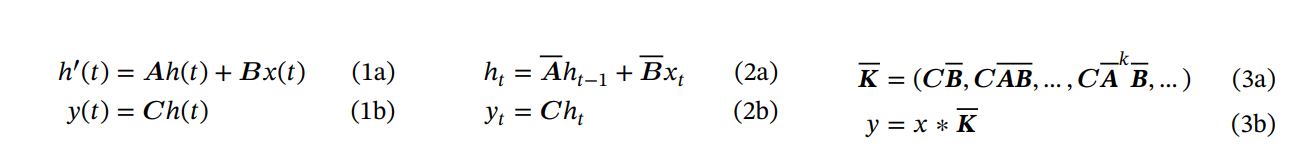

먼저, continuous parameter $(Δ,A,B)$를 discrete parameter $(\bar A,\bar B)$로 변환 후 (2)와 같이 재귀적으로 계산하거나 (3)과 같이 global convolution을 취할 수 있음

## **3. Selective State Space Models**

**Improving SSMs with Selection**

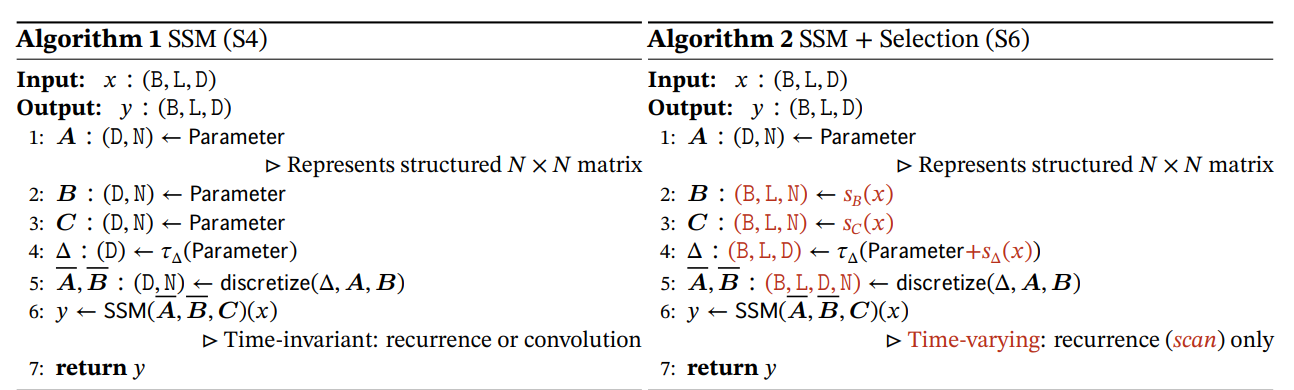


알고리즘 1, 2의 차이점은 크게 $Δ,B,C$가 input의 함수라는 것과, tensor shape, time-invariant에서 time-varying으로 변한 것  

SSMs의 parameters를 input에 대한 함수로 계산하여 정보의 필터링 역할을 할 수 있도록 함  

**Efficient Implementation of Selective SSMs**

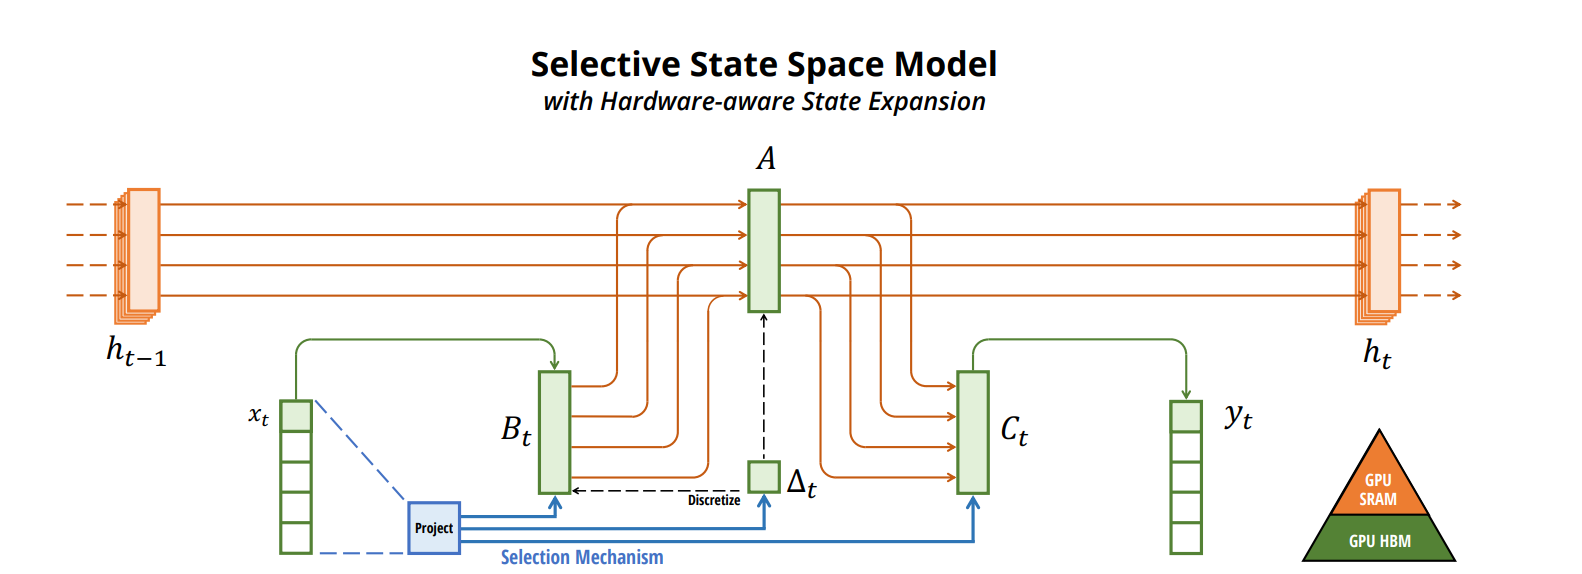

Selection mechanism은 기존 모델의 한계를 극복하도록 설계되었음  
주 아이디어는 GPU의 특징을 활용하여 보다 효율적인 메모리 계층에서만 state $h$를 구체화 하는것  

대부분의 연산은 메모리 대역폭에 의해 제한되는데 저자들은 kernel fusion을 이용하여 메모리 IO의 양을 줄여 속도를 향상 시킴  

구체적으로는 GPU HBM에서 scan input $(\bar A, \bar B)$을 준비하는 것 대신에 SSM parameters $(Δ, A,B,C)$를 느린 HBM에서 빠른 SRAM으로 직접 불러와 SRAM에서 discretization, recurrence를 수행하고 최종 결과를 다시 HBM으로 저장함  

순전파 시 역전파에 필요한 중간 state를 저장하지 않고 역전파시 다시 계산함으로써 메모리 사용량을 줄임

**A Simplified SSM Architecture**



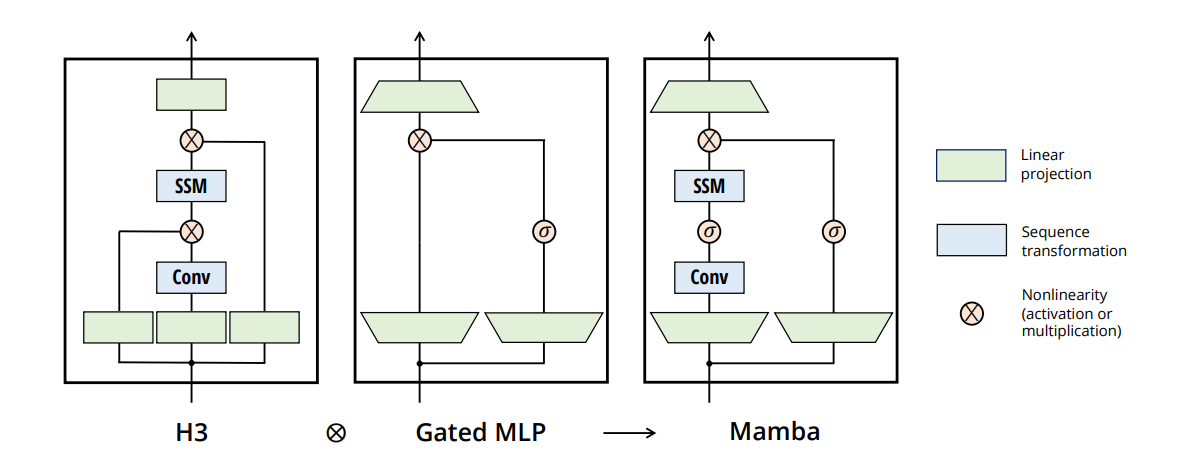

H3는 가장 잘 알려진 SSM 구조이며 일반적으로 linear attention과 MLP block으로 구성됨  

H3, GAU를 결합하여 Mamba block을 생성하고 Transformers와 같이 normalization, residual connection이 사용됨  

**Linear transformer ?**  

transformer :  

$$ O = softmax(\frac{QK^T}{\sqrt{d_h}})V $$  
linear transformer :  

$$ O_i = \frac{𝜙 (Q_i)^T \sum^i_{j=1} 𝜙(K_j) V_j^T}{𝜙(Q_i)^T \sum^i_{j=1} 𝜙(K_j)} $$  
로 부터 SSM form으로 다시 정리하면 아래와 같이 쓸 수 있음  

$$ S_i = S_{i-1} + 𝜙(K_i)V_i^T $$  
$$ O_i = 𝜙(Q_i)^TS_i $$

즉 linear transformer와 SSM은 동일한 식임을 알 수 있고 H3의 경우 식을 더 변형시켜 적용함

**Properties of Selection Mechnisms**

## **4. Empirical Evaluation**

**Selective copying & Induction head**

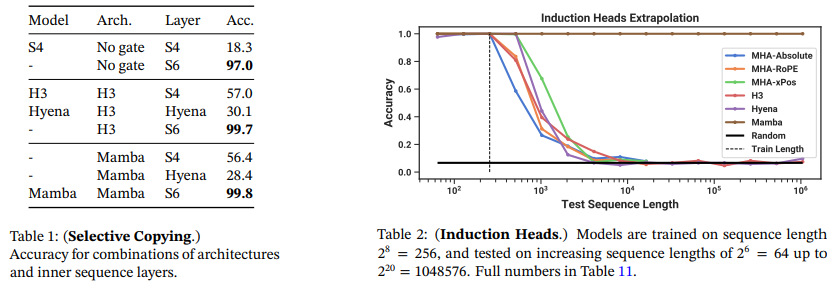

**Language modeling**

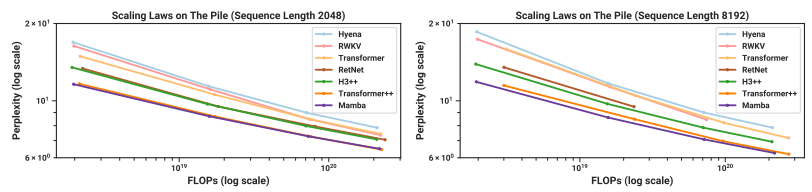

**DNA modeling & Audio modeling**

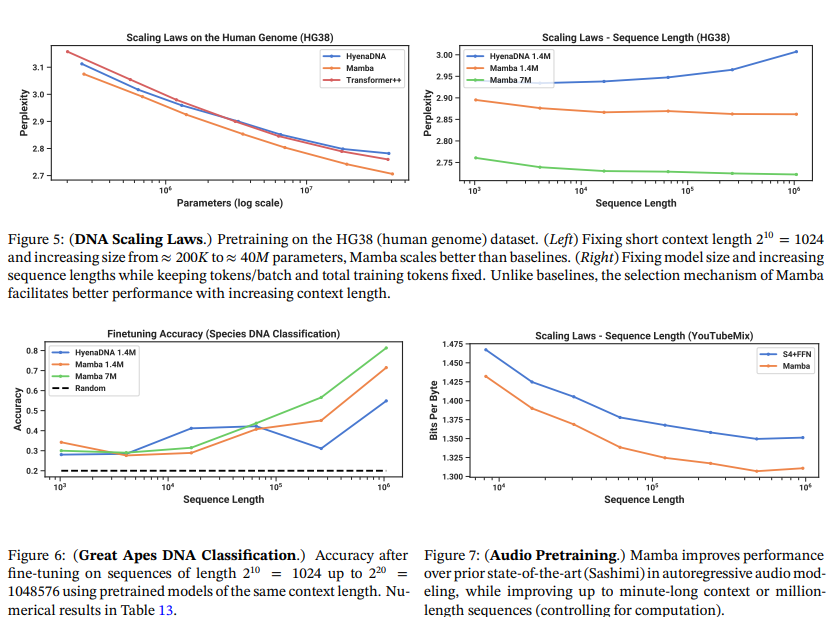

**Speed and Memory benchmarks**

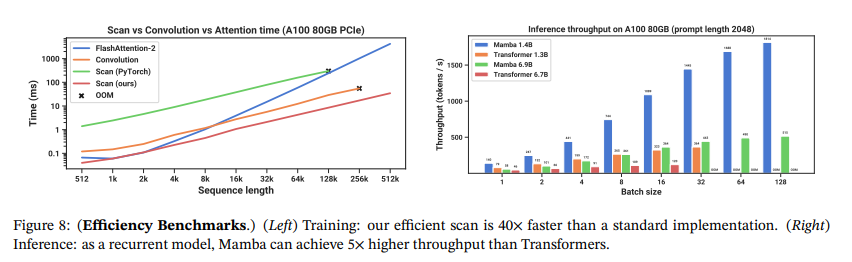